<a href="https://colab.research.google.com/github/Facunfer/Poryecto-Final-Facundo-Fernicola/blob/main/Proyecto_Final_Facundo_Fern%C3%ADcola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRESENTACIÓN DEL PROYECTO**

# Modelo para la predicción de la Diabetes

El objetivo de este proyecto es desarrollar un modelo de clasificación capaz de determinar si un paciente tiene diabetes

Para esto vamos a analizar una serie de variables, tanto demográficas como médicas. Estas variables incluyen factores como el sexo, la edad, y la raza del paciente, así como información médica, si el paciente es fumador, si tuvo cardiopatías, y los niveles de glucosa en sangre.

El objetivo del modelo es detectar los casos de diabetes de manera más rápida, y busca ser una herramienta para los profesionales de la salud, con el objetivo de acelerar la detección de esta enferemedad

## Contexto Comercial
El contexto comercial de este análisis es brindar una asistencia a centros médicos y de investigación con el objetivo de predecir de una manera mas eficaz los casos de diabetes.

## Preguntas e Hipótesis
 Se puede predecir la probabilidad de tener diabetes en base a factores demográficos o solo se explica en base a los hábitos de las personas. Y si este es el caso hay un segmento demógrafico más afectado por malos hábitos, lo cual hace que sea el más afectado por la diabetes.

 ## Objetivo
 El ojetivo de este proyecto es lograr un modelo de clasificación binaria donde se pueda diagnosticar la diabetes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Importo Librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
csv= pd.read_csv("diabetes_dataset.csv") # importo el dataset

In [ ]:
print(csv.shape) # veo el tamaño del dataset
csv.head() # veo las primeras filas

(100000, 16)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [ ]:
csv.info() # veo la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [ ]:
print(csv["year"].unique()) # veo los valores únicos de la columna year
print(csv["location"].unique()) # veo los valores únicos de la columna location

print(csv["location"].groupby(csv["location"]).count()) # veo la cantidad de valores únicos de la columna location

# Este análisis de los valores únicos de estas Columnas lo hago para descartarlas como variables



[2020 2015 2016 2019 2018 2021 2022]
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'United States'
 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming']
location
Alabama                 2036
Alaska                  2035
Arizona                 1986
Arkansas                2037
California              1986
Colorado                2035
Connecticut             2035
Delaware                2036
District of Columbia    2036
Florida                 2037
Geor

# **DESCRIPCIÓN DE VARIABLES**
En un principio al ver el dataset vemos dos variables las cuales no son importantes para el análisis:
*    year
*   location

¿Por que?

En el caso de la columna Year se elimina esta ya que no se busca hacer un análisis a través del tiempo sino que solo se busca analizar variables demógraficas y de hábitos, por lo cual no aporta el dato del año donde se tomo el registro.
Por otro lado en el caso de la columna de Location, que indica de que estado de EEUU proviene cada persona,  no se puede asegurar que sea representativa de la población total de cada estado. Es por esto que se elimina esta Variable

Es por Eso que a partir de ahora vamos a trabajar con **df** que va a ser el dataset sin estas dos variables

In [ ]:
df = csv.drop(["year","location"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                100000 non-null  object 
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   smoking_history       100000 non-null  object 
 10  bmi                   100000 non-null  float64
 11  hbA1c_level           100000 non-null  float64
 12  blood_glucose_level   100000 non-null  int64  
 13  diabetes              100000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 10.7

# Variables

 1   gender: Sexo de la persona   
 2   age: Edad del Paciente                  
 3   race:AfricanAmerican : Indica de con un valor binario si el paciente es afromericano.                       
 4   race:Asian : Indica de con un valor binario si el paciente es asiático.            
 5   race:Caucasian: Indica de con un valor binario si el paciente es caucásico.         
 6   race:Hispanic: Indica de con un valor binario si el paciente es Latino.             
 7   race:Other: Indica de con un valor binario si el paciente es de otra raza.              
 8   hypertension: Indica de con un valor binario si el paciente tiene hipertensión.          
 9   heart_disease: Indica de con un valor binario si el paciente tiene alguna cardiopatía.           
 10   smoking_history: Indica si el paciente fuma, y de ser así cuanto con cuanta frecuencia lo hace.       
 11  bmi: Indica el indice de masa corporal                 
 12  hbA1c_level: Indica el porcentaje del nivel promedio de azúcar en la sangre durante los últimos dos o tres meses.         
 13  blood_glucose_level: : Indica el nivel de glucosa en sangre       
 14  diabetes: **Valor Objetivo** indica si la persona tiene o no diabetes    


In [ ]:
df.describe() # veo los datos númericos de las distintas variables

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##**DETECCIÓN DE VALORES OUTLIERS**

Del análisis previo veo que todas las variables son binarias salvo:


*   age
*   bmi
*   hbA1c_level
*   blood_glucose_level

Es por esto que la detección de Outliers se va a hacer sobre estas variables para ver si hay algún valor anormal



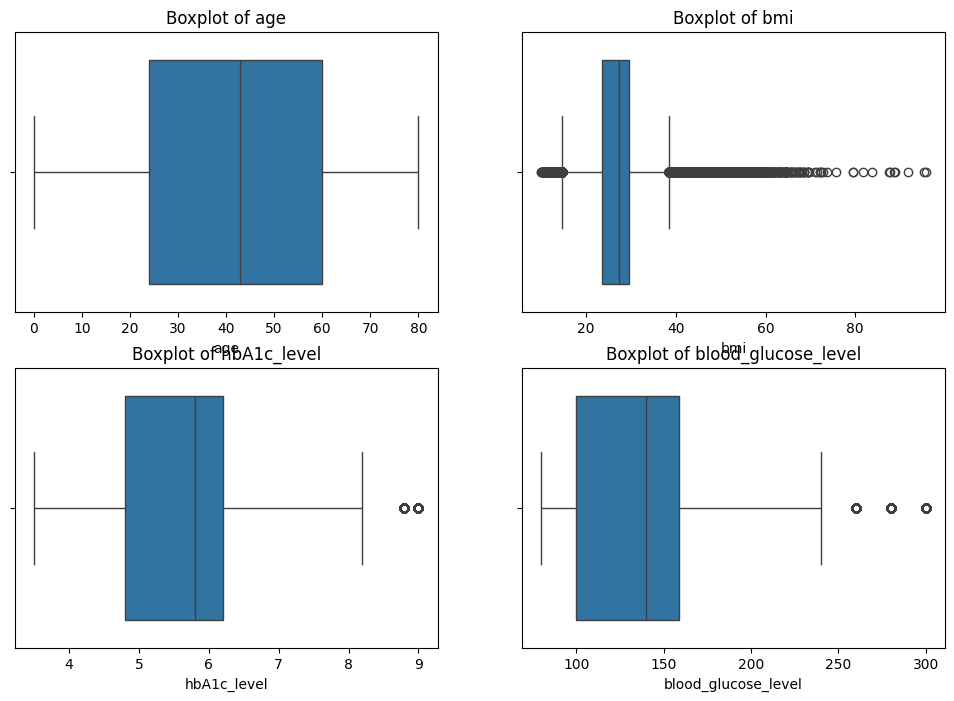

In [ ]:
outliers = df.loc[:,["age","bmi","hbA1c_level","blood_glucose_level"]] # creo un dataframe solo con las variables que me interesan

fig, ax = plt.subplots(2, 2, figsize=(12, 8)) # creo figura
columns = outliers.columns

for i, ax in enumerate(ax.flatten()):
    sns.boxplot(data=outliers, x=columns[i], ax=ax) # creo bucle for para graficar mis cuatro variables
    ax.set_title(f'Boxplot of {columns[i]}')

Del análisis de Outliers se observa que no existe la presencia de estos en la variable Edad, al contrario si vemos una gran presencia de estos en la variable BMI, por eso en principio quiero ver si estos outliers significan algo.

In [ ]:
df["bmi"].describe() # veo los datos númericos de bmi

# de este análisis veo que el 75 % de los valores están por debajo de 29.58 por lo cual mis valores por encima de este valor son los valores outliers, quiero ver cuantos son
# y si hay aguna relación con la diabetes

bmicomun = df.loc[df["bmi"] <= 29.58,["bmi","diabetes"]]
print(bmicomun) # creo un df con el 75% de los datos

bmi = df.loc[df["bmi"] > 29.58,["bmi","diabetes"]]
bmi # creo un df con el 25% de los datos Outliers

print(bmicomun["diabetes"].groupby(bmicomun["diabetes"]).count()) #en el caso del índice de masa corporal menor a 29.58 vemos que menos del 5% de los casos eran pacientes con diabetes
print(bmi["diabetes"].groupby(bmi["diabetes"]).count()) #en el caso del índice de masa corporal mayor a 29.58 vemos que más del 20% de los casos eran pacientes con diabetes


         bmi  diabetes
0      27.32         0
1      19.95         0
2      23.76         0
3      27.32         0
4      23.75         0
...      ...       ...
99991  27.32         0
99994  26.12         1
99995  21.21         0
99998  29.29         0
99999  17.16         0

[75015 rows x 2 columns]
diabetes
0    70930
1     4085
Name: diabetes, dtype: int64
diabetes
0    20570
1     4415
Name: diabetes, dtype: int64


**En Base al análisis anterior podemos observar que los valores outliers de índice de masa corporal nos indica una mayor propensión a tener diabetes por lo cual es vital conservar estos datos**.

Por otro lado analicemos los outliers de nivel promedio de azucar en sangre y de nivel de glucosa en sangre a ver si estos significan algo.

In [ ]:
print(df["hbA1c_level"].describe()) # veo los datos númericos de hba1c_level
print(df["blood_glucose_level"].describe()) # veo los datos númericos de blood_glucose_level

# Promedio de azucar en sangre

hbA1ccomun = df.loc[df["hbA1c_level"] <= 6.2,["hbA1c_level","diabetes"]]
hbA1c_level = df.loc[df["hbA1c_level"] > 6.2,["hbA1c_level","diabetes"]]

print(hbA1ccomun["diabetes"].groupby(hbA1ccomun["diabetes"]).count())
print(hbA1c_level["diabetes"].groupby(hbA1c_level["diabetes"]).count())

# Al igual que con el índice de masa corporal, de este análisis surge que cuando aumenta el porcentaje de nivel de azúcar en sangre la persona es más propensa a tener un cuadro diabético
# en los casos outliers la probabilidad es de casi un 30% mientras que en los valores normales es de menos de un 5%

blood_glucose_levelcom = df.loc[df["blood_glucose_level"] <= 159,["blood_glucose_level","diabetes"]]
blood_glucose_level = df.loc[df["blood_glucose_level"] > 159,["blood_glucose_level","diabetes"]]

print(blood_glucose_levelcom["diabetes"].groupby(blood_glucose_levelcom["diabetes"]).count())
print(blood_glucose_level["diabetes"].groupby(blood_glucose_level["diabetes"]).count())

# En cuanto al nivel de glucosa en sangre se mantiene esta tendencia, en el caso de los valores outliers la probabilidad de diabetes es de un 30 %, mientras que en los valores normales este valor es nuevamente menos de un 5 %



count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: hbA1c_level, dtype: float64
count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64
diabetes
0    75894
1     3309
Name: diabetes, dtype: int64
diabetes
0    15606
1     5191
Name: diabetes, dtype: int64
diabetes
0    77531
1     3880
Name: diabetes, dtype: int64
diabetes
0    13969
1     4620
Name: diabetes, dtype: int64


ANÁLISIS DE OUTLIERS

Del análisis realizado sobre los valores outliers surge que estos son claves para la detección de la diabetes, dado que la probabilidad de diabetes aumenta fuertemente cuando estos datos están lejos de la mediana.

Es por ello que para este modelo resulta esencial conservarlos

# **EDA**

Ahora nos vamos a proponer analizar las distintas variables

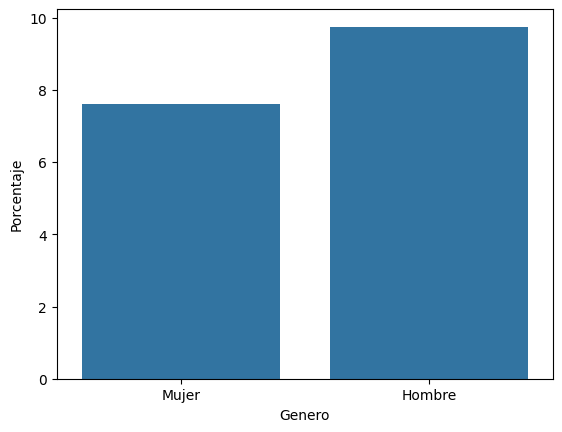

,Genero,Porcentaje
0,Mujer,7.618869
1,Hombre,9.748974


In [ ]:
totalmujeres = df[df["gender"] == "Female"].shape[0]  # Cuento total de mujeres sin importar de si tienen diabetes o no
totalhombres = df[df["gender"] == "Male"].shape[0]    # Cuento total de hombres sin importar de si tienen diabetes o no

df1 = df[df["diabetes"] == 1] # creo un df solo con pacientes con diabetes

pormujeres = df1[df1["gender"] == "Female"].groupby(df1["diabetes"]).count()["gender"] # cuento los casos de mujeres con diabetes
porhombres = df1[df1["gender"] == "Male"].groupby(df["diabetes"]).count()["gender"]   # cuento los casos de hombres con diabetes

porcmujeres = (pormujeres / totalmujeres) * 100  # obtengo el porcentaje de mujeres con diabetes sobre el total
porchombres = (porhombres / totalhombres) * 100 # obtengo el porcentaje de hombres con diabetes sobre el total

lista1 = [] # creo una lista

for i in porcmujeres:
    lista1.append({'Genero': 'Mujer', 'Porcentaje': i}) # hago un bucle con for para adjuntar el porcentaje de mujeres junto con su etiqueta

for i in porchombres:
   lista1.append({'Genero': 'Hombre', 'Porcentaje': i})


d = pd.DataFrame(lista1) # lo convierto a un df

ax = sns.barplot(x = 'Genero', y = 'Porcentaje', data = d)
plt.show() # grafico
d

# De este análisis surge que no hay una gran diferencia porcentual en la tendencia a tener diabetes entre hombres y mujeres
# Lo único que se visualiza es una muy mínima mayor probabilidad de los hombres en tener diabetes respecto a las mujeres (2%)


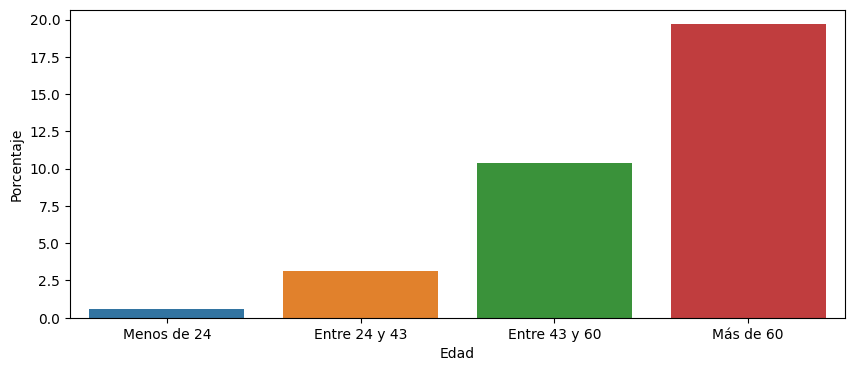

In [ ]:
df["age"].describe() # veo los datos numéricos de la edad

# En base a este análisis se puede segmentar la población en 4 grupos
# Menores de 24
# Mayores de 24 y menores de 43
# Mayores de 43 y menores de 60
# Mayores de 60

edad = df.loc[:,["age","diabetes"]] # creo un df con edad y diabetes

menos24 = edad.loc[edad["age"] < 24,["age"]].count() # cuento el total de menores de 24
mas24ymen43 = edad.loc[(edad["age"] >= 24) & (edad["age"] < 43),["age"]].count() # cuento el total de mayores de 24 y menores de 43
mas43ymen60 = edad.loc[(edad["age"] >= 43) & (edad["age"] < 60),["age"]].count() # cuento el total de mayores de 43 y menores de 60
mas60 = edad.loc[edad["age"] >= 60,["age"]].count() # cuento el total de mayores de 60

menos24diab = edad.loc[(edad["age"] < 24) & (edad["diabetes"] == 1),["age"]].count()
mas24ymen43diab = edad.loc[(edad["age"] >= 24) & (edad["age"] < 43) & (edad["diabetes"] == 1),["age"]].count()
mas43ymen60diab = edad.loc[(edad["age"] >= 43) & (edad["age"] < 60) & (edad["diabetes"] == 1),["age"]].count()
mas60diab = edad.loc[(edad["age"] >= 60) & (edad["diabetes"] == 1),["age"]].count()

# calcule las cantidades por edad que tienen diabetes

porc24 = (menos24diab / menos24) * 100
porc43 = (mas24ymen43diab / mas24ymen43) * 100
porc60 = (mas43ymen60diab / mas43ymen60) * 100
porc60mas = (mas60diab / mas60) * 100

# calculo los porcentajes de diabtes por edad

lista = []

for i in porc24:
  lista.append({'Edad': 'Menos de 24', 'Porcentaje': i})
  for i in porc43:
   lista.append({'Edad': 'Entre 24 y 43', 'Porcentaje': i})
for i in porc60:
  lista.append({'Edad': 'Entre 43 y 60', 'Porcentaje': i})
  for i in porc60mas:
    lista.append({'Edad': 'Más de 60', 'Porcentaje': i})

df4 = pd.DataFrame(lista)


fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x = 'Edad', y = 'Porcentaje', data = df4, hue='Edad')
plt.show()
# Acá si apreciamos que la edad es una variable central, ya que con el aumento de esta aumenta exponcialmente la posibilidad de diabetes




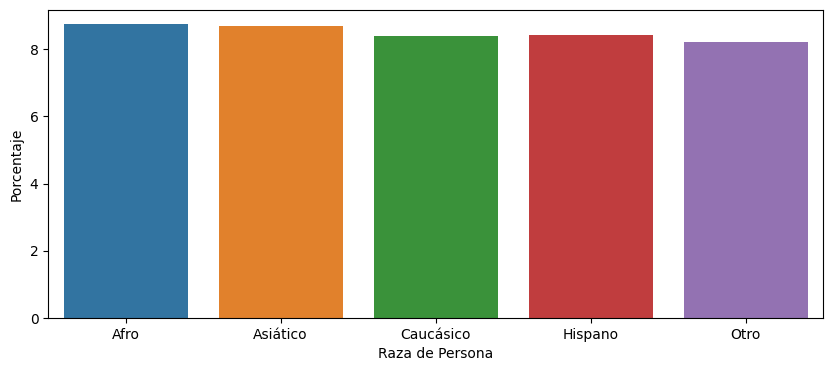

,Raza de Persona,Porcentaje
0,Afro,8.742521
1,Asiático,8.708469
2,Caucásico,8.402093
3,Hispano,8.427192
4,Otro,8.215822


In [ ]:
raza = df.loc[:,["race:AfricanAmerican","race:Asian","race:Caucasian","race:Hispanic","race:Other","diabetes"]] # creo un df con raza y diabetes

totalafro = raza.loc[raza["race:AfricanAmerican"] == 1,"race:AfricanAmerican"].count()
totalasia = raza.loc[raza["race:Asian"] == 1,"race:Asian"].count()
totalcau = raza.loc[raza["race:Caucasian"] == 1,"race:Caucasian"].count()
totalhis = raza.loc[raza["race:Hispanic"] == 1,"race:Hispanic"].count()
totalotro = raza.loc[raza["race:Other"] == 1,"race:Other"].count()

# cuento el total por cada raza del conjunto de datos

totalafrodiab = raza.loc[(raza["race:AfricanAmerican"] == 1) & (raza["diabetes"] == 1),"race:AfricanAmerican"].count()
totalasiadiab = raza.loc[(raza["race:Asian"] == 1) & (raza["diabetes"] == 1),"race:Asian"].count()
totalcaudiab = raza.loc[(raza["race:Caucasian"] == 1) & (raza["diabetes"] == 1),"race:Caucasian"].count()
totalhisdiab = raza.loc[(raza["race:Hispanic"] == 1) & (raza["diabetes"] == 1),"race:Hispanic"].count()
totalotrodiab = raza.loc[(raza["race:Other"] == 1) & (raza["diabetes"] == 1),"race:Other"].count()

porcafro = (totalafrodiab / totalafro) * 100
porcasias = (totalasiadiab / totalasia) * 100
porcacau = (totalcaudiab / totalcau) * 100
porchis = (totalhisdiab / totalhis) * 100
porcotro = (totalotrodiab / totalotro) * 100

lis10 = []

lis10.append({'Raza de Persona': 'Afro', 'Porcentaje': porcafro})
lis10.append({'Raza de Persona': 'Asiático', 'Porcentaje': porcasias})
lis10.append({'Raza de Persona': 'Caucásico', 'Porcentaje': porcacau})
lis10.append({'Raza de Persona': 'Hispano', 'Porcentaje': porchis})
lis10.append({'Raza de Persona': 'Otro', 'Porcentaje': porcotro})

nuevodf = pd.DataFrame(lis10)

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x = 'Raza de Persona', y = 'Porcentaje', data = nuevodf, hue='Raza de Persona')
plt.show()
nuevodf


# De este análisis surge que el porcentaje de probabilidad entre las distinas razas


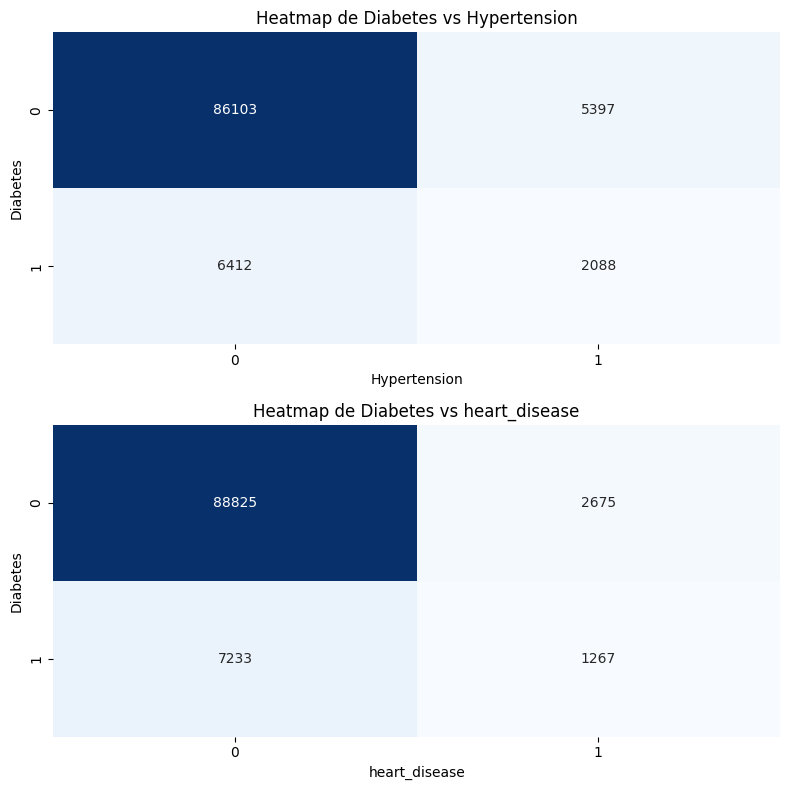

In [ ]:
tabla1 = pd.crosstab(df['diabetes'], df['hypertension'])
tabla2 = pd.crosstab(df['diabetes'], df['heart_disease'])

# Crear el heatmap basado en la tabla de contingencia
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(8, 8))
sns.heatmap(tabla1, annot=True, cmap='Blues', cbar=False,fmt='d', ax=ax1)
ax1.set_xlabel('Hypertension')
ax1.set_ylabel('Diabetes')
ax1.set_title('Heatmap de Diabetes vs Hypertension')



sns.heatmap(tabla2, annot=True, cmap='Blues', cbar=False,fmt='d', ax=ax2)
ax2.set_xlabel('heart_disease')
ax2.set_ylabel('Diabetes')
ax2.set_title('Heatmap de Diabetes vs heart_disease')

plt.tight_layout()
plt.show()

# en esta porción de código busco mediante un heatmap ver la relación entre la gente que tiene hipertensión y cardiopatías y la probabilidad de teener diabetes

# En ambos casos vemos que la gente con estas enfermedades es más propensa a tener.
# En ambos casos vemos que de la gente que tiene estas enfermedades el 75% tiene diabetes,
# mientras que en el caso de la gente que no las tiene este porcentaje no llega al 10%

# Es por esto que estas resultan variables importantes para poder detectar la diabetes


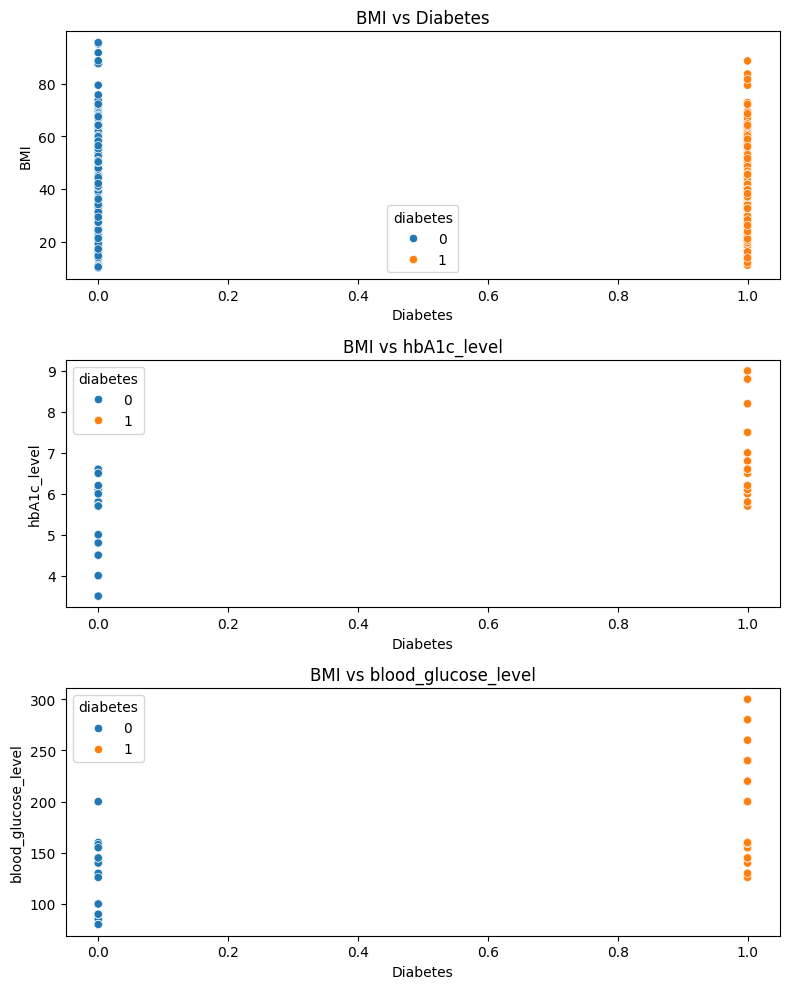

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8, 10))
sns.scatterplot(x = 'diabetes', y = 'bmi', data = df, hue='diabetes', ax=ax1)
ax1.set_xlabel('Diabetes')
ax1.set_ylabel('BMI')
ax1.set_title('BMI vs Diabetes')

sns.scatterplot(x = 'diabetes', y = 'hbA1c_level', data = df, hue='diabetes', ax=ax2)
ax2.set_xlabel('Diabetes')
ax2.set_ylabel('hbA1c_level')
ax2.set_title('BMI vs hbA1c_level')

sns.scatterplot(x = 'diabetes', y = 'blood_glucose_level', data = df, hue='diabetes', ax=ax3)
ax3.set_xlabel('Diabetes')
ax3.set_ylabel('blood_glucose_level')
ax3.set_title('BMI vs blood_glucose_level')


plt.tight_layout()
plt.show()


# en los siguientes casos se busca analizar la correlación
# entre la diabetes y el índice de masa corporal, el porcentaje del nivel promedio de azúcar, y el nivel de glucosa en sangre

# De este análisis surge que
# No hay una relación entre un mayor nivel de masa corporal y la propensión a tener diabetes
# En el caso del nivel promedio de azúcar se ve claramente una relación entre un nivel promedio alto de azucar en sangre y la propensión de tener diabetes
# En el caso de nivel de glucosa en sangre también se ve una relación con la propensión a tener diabetes, pero no tan marcada como con el nivel promedio de azucar

['never' 'not current' 'current' 'No Info' 'ever' 'former']


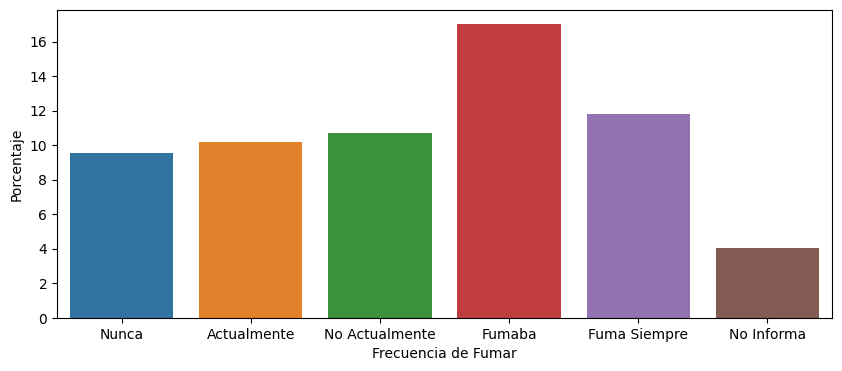

In [ ]:
df1=df[['smoking_history','diabetes']]

print(df1['smoking_history'].unique())


totalnofum = df1.loc[df1['smoking_history'] == 'never', 'smoking_history'].count()
totalfuma = df1.loc[df1['smoking_history'] == 'current', 'smoking_history'].count()
totalnoacutalmente = df1.loc[df1['smoking_history'] == 'not current', 'smoking_history'].count()
totalfumaba = df1.loc[df1['smoking_history'] == 'former', 'smoking_history'].count()
totalfumasiempre = df1.loc[df1['smoking_history'] == 'ever', 'smoking_history'].count()
totalsininfo = df1.loc[df1['smoking_history'] == 'No Info', 'smoking_history'].count()

nofumdiab = df1.loc[(df1['smoking_history'] == 'never') & (df1['diabetes'] == 1), 'smoking_history'].count()
fumadiab = df1.loc[(df1['smoking_history'] == 'current') & (df1['diabetes'] == 1), 'smoking_history'].count()
noacutalmentediab = df1.loc[(df1['smoking_history'] == 'not current') & (df1['diabetes'] == 1), 'smoking_history'].count()
fumabadiab = df1.loc[(df1['smoking_history'] == 'former') & (df1['diabetes'] == 1), 'smoking_history'].count()
fumasiemprediab = df1.loc[(df1['smoking_history'] == 'ever') & (df1['diabetes'] == 1), 'smoking_history'].count()
sininfodiab = df1.loc[(df1['smoking_history'] == 'No Info') & (df1['diabetes'] == 1), 'smoking_history'].count()

porcnofum = (nofumdiab / totalnofum) * 100
porcfuma = (fumadiab / totalfuma) * 100
porcnoacutalmente = (noacutalmentediab / totalnoacutalmente) * 100
porcfumaba = (fumabadiab / totalfumaba) * 100
porcfumasiempre = (fumasiemprediab / totalfumasiempre) * 100
porcnoinfo = (sininfodiab / totalsininfo) * 100

listafuma = []

listafuma.append({'Frecuencia de Fumar': 'Nunca', 'Porcentaje': porcnofum})
listafuma.append({'Frecuencia de Fumar': 'Actualmente', 'Porcentaje': porcfuma})
listafuma.append({'Frecuencia de Fumar': 'No Actualmente', 'Porcentaje': porcnoacutalmente})
listafuma.append({'Frecuencia de Fumar': 'Fumaba', 'Porcentaje': porcfumaba})
listafuma.append({'Frecuencia de Fumar': 'Fuma Siempre', 'Porcentaje': porcfumasiempre})
listafuma.append({'Frecuencia de Fumar': 'No Informa', 'Porcentaje': porcnoinfo})

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x = 'Frecuencia de Fumar', y = 'Porcentaje', data = pd.DataFrame(listafuma), hue='Frecuencia de Fumar')
plt.show()



# En este análisis podemos observar que entre los casos de ex fumadores hay una mayor propeensión a tener diabetes



# **CONCLUSIONES DEL EDA**

Del análisis exploratorio de datos podemos señalar que:

*   Hay un muy leve (2%) mayor porcentaje de tener diabetes en los hombres respecto a las mujeres
*   Hay un claro aumento de la probabilidad de tener diabetes en relación al aumento de la edad.
*   No hay una mayor probabilidad tener diabetes en base a la raza
*   Las personas con problemas de Hipertensión y Cardiopatías tienen una mayor probabilidad de tener diabetes
*   No hay una relación entre el Indice de masa corporal y la probabilidad de tener diabetes
*   Hay una clara relación entre un alto promedio de nivel de azucar en sangre y la propensión a la diabetes
*   Hay una cierta relación entre un mayor nivel de clucosa en sangre y una mayor tendencia a tener diabetes
*   En el caso de las personas que fumaron hay una mayor propensión a tener diabetes





# **Preprocesamiento de datos**

In [ ]:
df = pd.get_dummies(df, columns=['gender','smoking_history'])
df.head()

# Primeramente transformo mis columnas con variables categóricas con one hot encoding

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,...,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,0,0,1,0,0,27.32,5.0,...,0,True,False,False,False,False,False,False,True,False
1,29.0,0,1,0,0,0,0,0,19.95,5.0,...,0,True,False,False,False,False,False,False,True,False
2,18.0,0,0,0,0,1,0,0,23.76,4.8,...,0,False,True,False,False,False,False,False,True,False
3,41.0,0,0,1,0,0,0,0,27.32,4.0,...,0,False,True,False,False,False,False,False,True,False
4,52.0,1,0,0,0,0,0,0,23.75,6.5,...,0,True,False,False,False,False,False,False,True,False


In [ ]:
X = df.drop(['diabetes', 'race:AfricanAmerican','race:AfricanAmerican','race:AfricanAmerican','race:Hispanic','race:Other'], axis=1)
y = df['diabetes']

# en un principio de mis variables elimino diabetes ya que es la variable objetivo y las variables de raza ya que como se vió en el EDA
# estas variables no aportan a la predicción de la diabetes
# Asimismo en un principio dejo la columna de géneros, porque si bien hay una mínima diferencia entre la probabilidad de hombres y mujeres quiero vr si esto aporta al modelo

In [ ]:
X

,age,race:Asian,race:Caucasian,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,32.0,0,0,0,0,27.32,5.0,100,True,False,False,False,False,False,False,True,False
1,29.0,1,0,0,0,19.95,5.0,90,True,False,False,False,False,False,False,True,False
2,18.0,0,0,0,0,23.76,4.8,160,False,True,False,False,False,False,False,True,False
3,41.0,0,1,0,0,27.32,4.0,159,False,True,False,False,False,False,False,True,False
4,52.0,0,0,0,0,23.75,6.5,90,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33.0,0,0,0,0,21.21,6.5,90,True,False,False,False,False,False,False,True,False
99996,80.0,1,0,0,0,36.66,5.7,100,True,False,False,True,False,False,False,False,False
99997,46.0,1,0,0,0,36.12,6.2,158,False,True,False,False,False,True,False,False,False
99998,51.0,0,0,0,0,29.29,6.0,155,True,False,False,False,False,False,False,False,True


# **MODELO**

##**Modelo de Regresión logistica**

Se elige este modelo debido a que es el que mejor se adapta a las necesidades de mi set de Datos, esto es ya que necesito una clasificación binaria de tiene/no tiene diabetes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Importo Librerías

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [ ]:
modelo = LogisticRegression() # creo el modelo
modelo.fit(X_train, y_train) # entreno el modelo

LogisticRegression()

In [ ]:
prediccion = modelo.predict(X_test) # veo el que predice el modelo sobre las variables x de entrenamiento

In [ ]:
# veo el nivel de acierto del modelo

print(accuracy_score(y_test, prediccion))

#La métrica obteenida el de un nivel de acierto del 95% lo cual es un buen nivel de predicción

0.9576


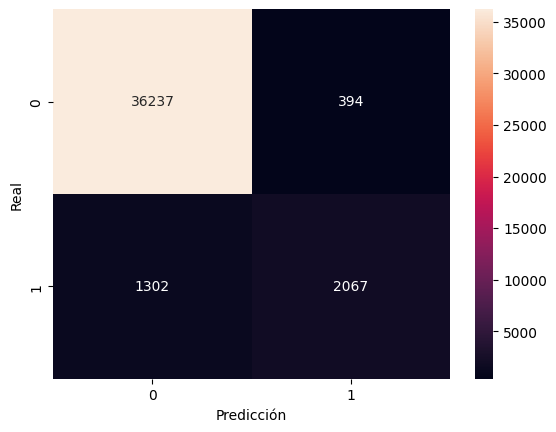

In [ ]:
matriz = confusion_matrix(y_test, prediccion)
ax = sns.heatmap(matriz, annot=True, fmt='d', color='blue')
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
plt.show()

# **CONCLUSIONES FINALES**

Del análisis del conjunto de datos pudimos observar que no hay factores demográficos o raciales para la detección de la diabetes sino que la propensión a tener diabetes surge de los hábitos de la persona así como de otras enfermedades que pueda tener, asimismo vimos que la edad es factor de riesgo central.

Todo este análisis finalizó con un modelo acertivo que pudo determinar en el 95% de los casos de manera correcta si una persona tenía diabetes o no.